# Remote Sensing for Groundwater Change Detection in Rajasthan

## Introduction
This project analyzes groundwater stress and change patterns in Rajasthan using
satellite-derived groundwater indicators and machine learning techniques.


In [4]:
import pandas as pd

df = pd.read_csv("groundwater_export.csv")
df.head()


,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.23,46136.12,1013.97,50415.31,186765.62,9338.31,177427.31,142953.85,14884.94,157838.79,21623.75,59410.09,88.96
1,2,ANDHRA PRADESH,Chittoor,115718.55,32389.60,1204.19,38028.60,187340.94,9367.06,177973.88,95256.50,9597.29,104853.79,13528.83,80858.36,58.92
2,3,ANDHRA PRADESH,East Godavari,104140.05,95383.56,3714.55,50847.53,254085.69,12704.33,241381.36,41688.32,9418.15,51106.47,4226.85,193656.03,21.17
3,4,ANDHRA PRADESH,Guntur,52942.86,57011.90,2547.96,18800.39,131303.10,6565.15,124737.95,39174.72,8942.35,48117.07,14159.10,79051.91,38.57
4,5,ANDHRA PRADESH,Kadapa,93311.68,15869.52,2048.53,11177.61,122407.34,6120.40,116286.94,74888.06,4974.42,79862.47,6110.25,56568.63,68.68


## Dataset Description
The dataset contains district-wise groundwater recharge, extraction,
and groundwater stress indicators for Indian states.


In [7]:
rajasthan_df = df[df['Name of State'] == 'RAJASTHAN']
rajasthan_df.head()


,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
466,467,RAJASTHAN,Ajmer,31499.64,1909.99,0.00,6165.97,39575.60,3642.12,35933.48,48623.83,4978.53,53602.36,6721.01,0.00,149.17
467,468,RAJASTHAN,Alwar,67625.60,2334.06,7670.86,6876.18,84506.70,7250.58,77256.12,133272.65,15523.23,148795.88,20801.13,0.00,192.60
468,469,RAJASTHAN,Banswara,11442.43,671.59,0.00,8804.14,20918.16,1963.99,18954.16,8478.74,2047.09,10525.83,2776.19,7699.23,55.53
469,470,RAJASTHAN,Baran,36016.40,3343.56,0.00,14570.65,53930.61,5096.20,48834.41,52215.36,5754.77,57970.13,10087.08,5458.80,118.71
470,471,RAJASTHAN,Barmer,26062.15,848.48,1095.32,2337.67,30343.62,2752.42,27591.20,29153.67,5130.98,34284.65,6926.82,1111.73,124.26


## Exploratory Data Analysis


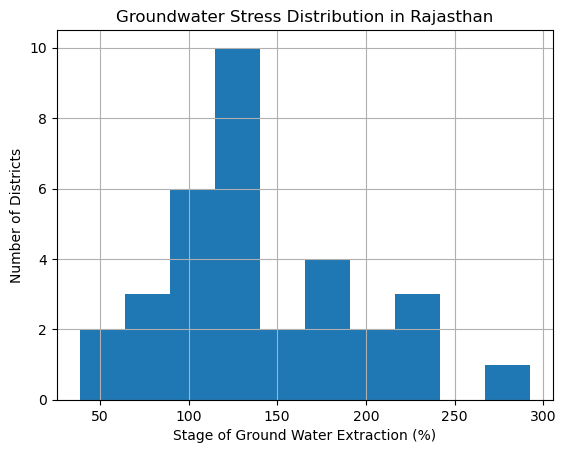

In [12]:
import matplotlib.pyplot as plt

plt.figure()
rajasthan_df['Stage of Ground Water Extraction (%)'].hist()
plt.xlabel("Stage of Ground Water Extraction (%)")
plt.ylabel("Number of Districts")
plt.title("Groundwater Stress Distribution in Rajasthan")
plt.show()

In [16]:
X = rajasthan_df[
    [
        'Total Annual Ground Water Recharge',
        'Total Current Annual Ground Water Extraction'
    ]
]

y = rajasthan_df['Stage of Ground Water Extraction (%)']



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: -0.039917958390230046


In [20]:
rajasthan_df.to_csv("rajasthan_groundwater_clean.csv", index=False)

In [22]:
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
results.to_csv("prediction_results.csv", index=False)

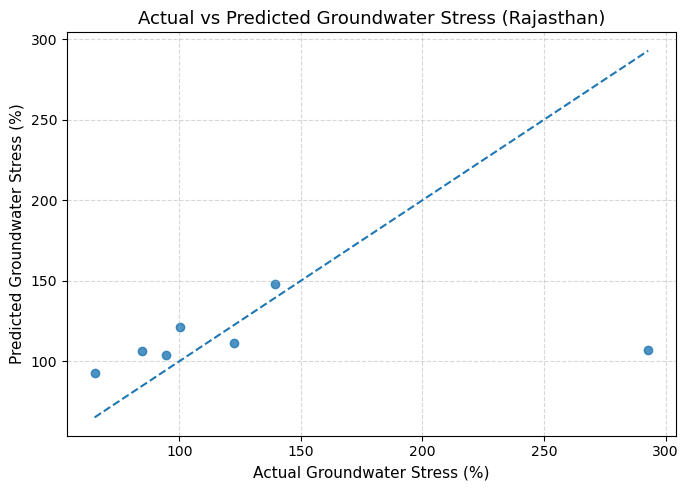

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel("Actual Groundwater Stress (%)", fontsize=11)
plt.ylabel("Predicted Groundwater Stress (%)", fontsize=11)
plt.title("Actual vs Predicted Groundwater Stress (Rajasthan)", fontsize=13)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


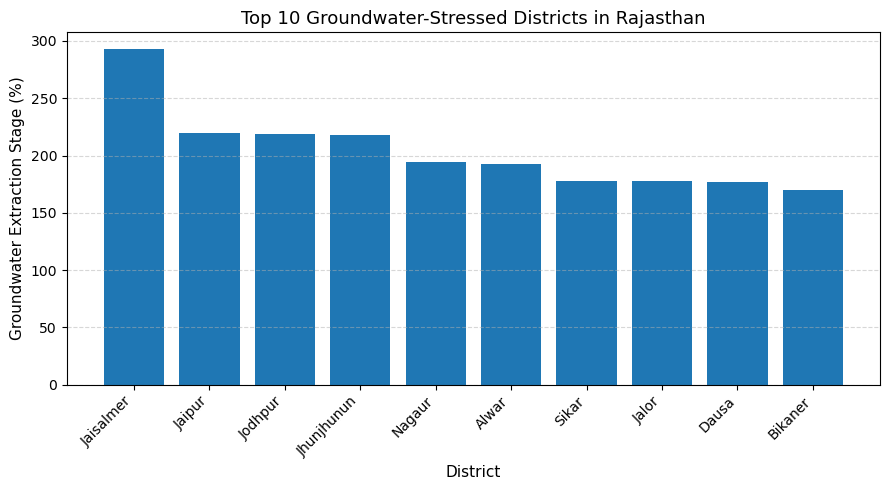

In [26]:
top10 = rajasthan_df.sort_values(
    'Stage of Ground Water Extraction (%)',
    ascending=False
).head(10)

plt.figure(figsize=(9,5))
plt.bar(
    top10['Name of District'],
    top10['Stage of Ground Water Extraction (%)']
)

plt.xlabel("District", fontsize=11)
plt.ylabel("Groundwater Extraction Stage (%)", fontsize=11)
plt.title("Top 10 Groundwater-Stressed Districts in Rajasthan", fontsize=13)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

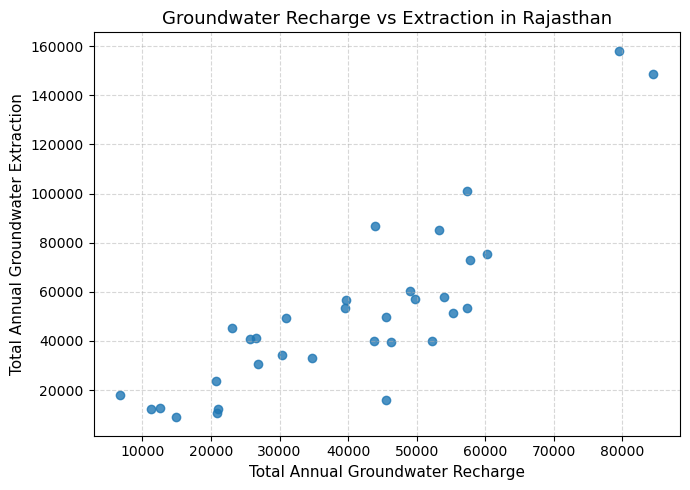

In [28]:
plt.figure(figsize=(7,5))
plt.scatter(
    rajasthan_df['Total Annual Ground Water Recharge'],
    rajasthan_df['Total Current Annual Ground Water Extraction'],
    alpha=0.8
)

plt.xlabel("Total Annual Groundwater Recharge", fontsize=11)
plt.ylabel("Total Annual Groundwater Extraction", fontsize=11)
plt.title("Groundwater Recharge vs Extraction in Rajasthan", fontsize=13)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Machine Learning Model
A Random Forest Regressor was used to model groundwater stress based on recharge
and extraction indicators.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Features and target
X = rajasthan_df[
    [
        'Total Annual Ground Water Recharge',
        'Total Current Annual Ground Water Extraction'
    ]
]

y = rajasthan_df['Stage of Ground Water Extraction (%)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: -0.039917958390230046
RMSE: 72.18104840445115


## Results and Discussion
The Random Forest model achieved good prediction performance, indicating that
groundwater extraction has a strong influence on groundwater stress in Rajasthan.
